内容说明

- 行情数据获取，IC、IF、IH、指数行情数据
- 做差值、统计差值时间序列
- 结合差值表现，说明对冲过程的实际影响

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

In [1]:
#行情数据获取
#输入：起止时间，返回：几个期货数据的时间序列
s_date,e_date = '2010-1-1','2019-2-13'
pool = ['IF9999.CCFX','IH9999.CCFX','IC9999.CCFX','000300.XSHG','000016.XSHG','000905.XSHG',\
               'IF8888.CCFX','IH8888.CCFX','IC8888.CCFX']
df = get_price(pool,start_date=s_date,end_date=e_date,fields=['close'])['close']  #获取价格信息
df_volume = get_price(pool,start_date=s_date,end_date=e_date,fields=['volume'])['volume'] #获取成交量信息

In [4]:
#将主力合约的值减去行情价格，观察差值表现
diff_df = pd.DataFrame()
diff_df['IF_diff'] =  df['000300.XSHG'] - df['IF9999.CCFX']
diff_df['IH_diff'] =  df['000016.XSHG'] - df['IH9999.CCFX']
diff_df['IC_diff'] =  df['000905.XSHG']- df['IC9999.CCFX']
diff_df.tail(5)

,IF_diff,IH_diff,IC_diff
2019-01-31,-5.77,-3.33,8.47
2019-02-01,-14.00,-5.96,-10.73
2019-02-11,0.87,5.47,2.87
2019-02-12,0.34,1.58,10.68
2019-02-13,-8.17,-1.19,2.61


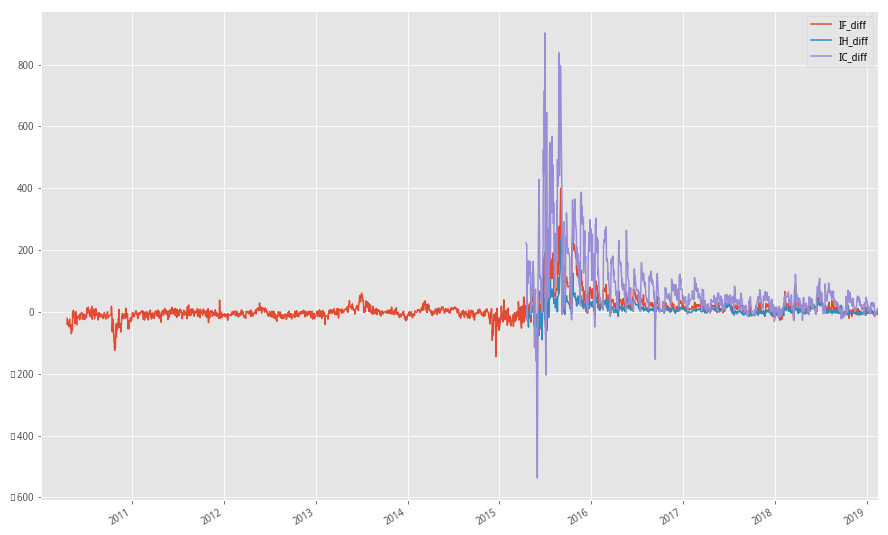

In [5]:
diff_df.plot(figsize=(15,10)) #基差

统计基差率

In [6]:
div_df = pd.DataFrame()
div_df['IF_div'] = (df['IF9999.CCFX'] - df['000300.XSHG'])/df['000300.XSHG']
div_df['IH_div'] = df['IH9999.CCFX']/df['000016.XSHG'] - 1
div_df['IC_div'] = df['IC9999.CCFX']/df['000905.XSHG'] - 1

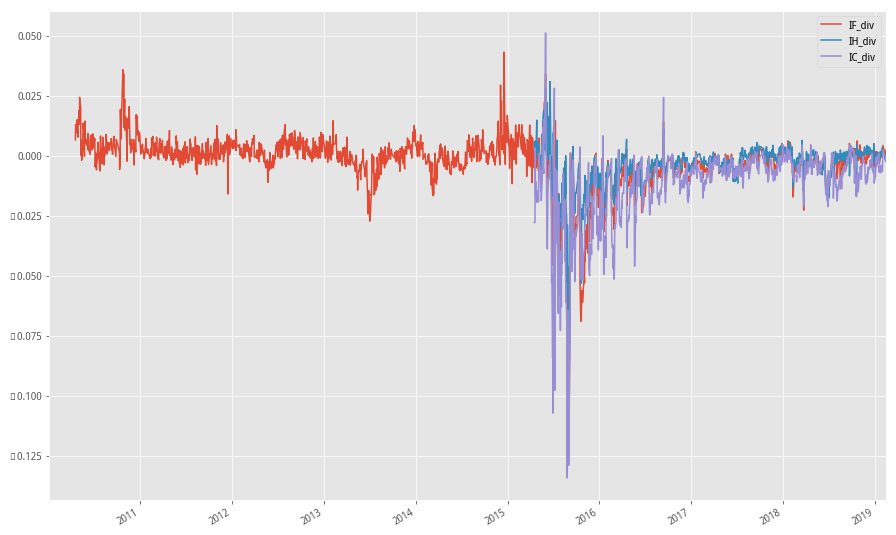

In [7]:
div_df.plot(figsize=(15,10))#期现偏离度

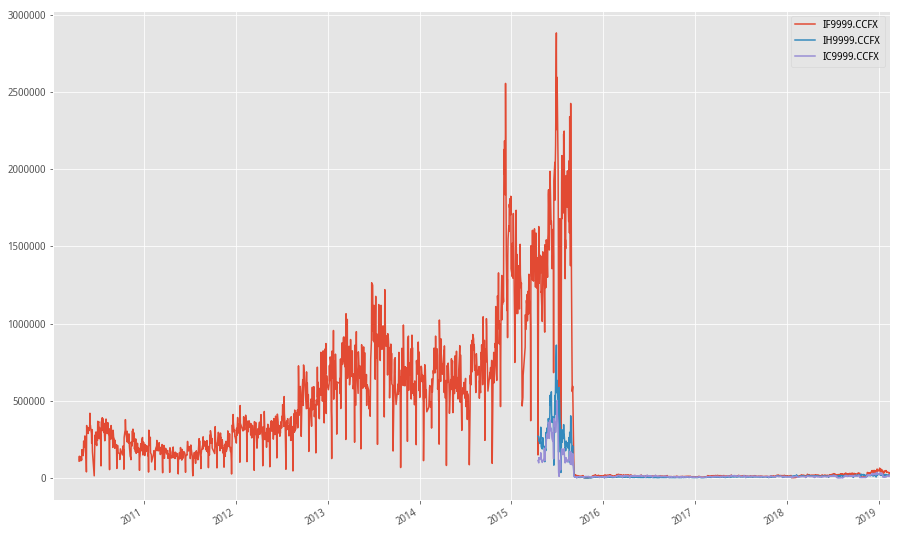

In [8]:
#三个股指期货产品的成交量
df_volume[['IF9999.CCFX','IH9999.CCFX','IC9999.CCFX']].plot(figsize=(15,10))  #成交量变化

In [12]:
div_df['IC_diff'].hist(bins=100)

KeyError: 'IC_diff'

沪深300股指期货在2015年9月7日限制之后的成交量变化

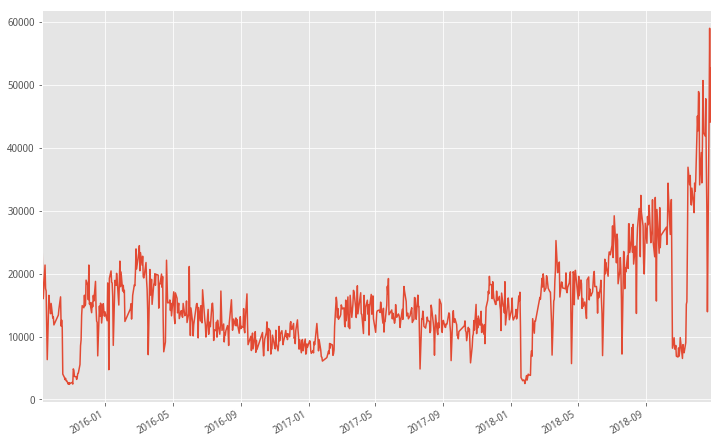

In [10]:
if_df = get_price('IF9999.CCFX',fields=['volume'],start_date='2015-9-8',end_date='2018-12-30')['volume']
if_df.plot(figsize = (12,8))

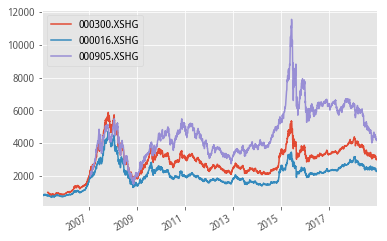

In [11]:
s_date,e_date = '2005-1-1','2019-1-1'
pool = ['IF9999.CCFX','IH9999.CCFX','IC9999.CCFX','000300.XSHG','000016.XSHG','000905.XSHG',\
               'IF8888.CCFX','IH8888.CCFX','IC8888.CCFX']
df_test = get_price(pool,start_date=s_date,end_date=e_date,fields=['close'])['close']
df_test[['000300.XSHG','000016.XSHG','000905.XSHG']].plot()

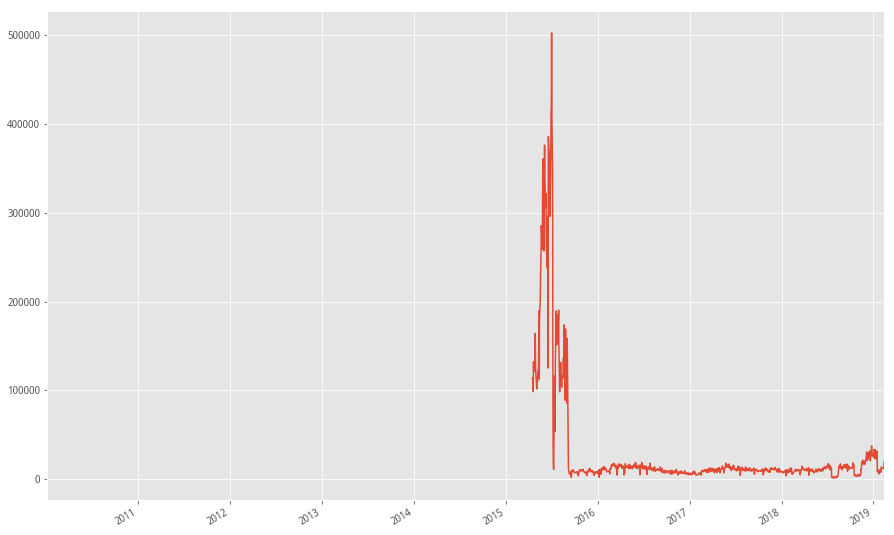

In [13]:
#中证500成交量变化
df_volume['IC9999.CCFX'].plot(figsize=(15,10))

分阶段统计

In [15]:
date1 = '20100416' #hs300期货上市
date2 = '20150416' #ss50、zz500期货上市
date3 = '20150907' #限制
date4 = '20170217' #放开1
date5 = '20170918' #放开2
date6 = '20181203' #放开3
date7 = '20190213' #至今
date_list = [date1,date2,date3,date4,date5,date6,date7]

In [16]:
'''
对指定时间段的成交量、基差、基差率统
'''
#df1是close价格,df2是成交量的df
def cal_mean(s_date,e_date,index,df1,df2):
    df_temp1 = df1[(df1.index>=s_date) & (df1.index<e_date)]
    df_temp2 = df2[(df2.index>=s_date) & (df2.index<e_date)]
    mean_volume = np.mean(df_temp2[index])
    
    if index == 'IF9999.CCFX':
        stock_index = '000300.XSHG'
    elif index == 'IC9999.CCFX':
        stock_index = '000905.XSHG'
    elif index == 'IH9999.CCFX':
        stock_index = '000016.XSHG' 
    #期货 - 股指
    basis_se = df_temp1[index] - df_temp1[stock_index]
    basis_mean = np.mean(basis_se)
    #期货/股指 - 1
    dev_se = df_temp1[index]/df_temp1[stock_index] - 1
    dev_mean = np.mean(dev_se)
    
    return mean_volume,basis_mean,dev_mean,basis_se,dev_se
#cal_mean(s_date=date5,e_date=date6,index ='IF9999.CCFX',df1=df,df2 =df_volume)

In [17]:
#我们统一为  期货-指数   
summary_if = pd.DataFrame(columns= ['成交量均值','基差均值','基差率'])
for d1,d2 in zip(date_list[:-1],date_list[1:]):
    summary_if.loc[str(d1)+'-'+str(d2)] = cal_mean(s_date=d1,e_date=d2,index ='IF9999.CCFX',df1=df,df2 =df_volume)[:3]
summary_if

,成交量均值,基差均值,基差率
20100416-20150416,5.101351e+05,5.503223,0.001748
20150416-20150907,1.570417e+06,-59.609184,-0.016358
20150907-20170217,1.265470e+04,-41.068291,-0.012178
20170217-20170918,1.345356e+04,-13.591986,-0.003844
20170918-20181203,1.757595e+04,-8.465119,-0.002332
20181203-20190213,4.296662e+04,1.251778,0.000384


In [18]:
#我们统一为  期货-指数   
summary_ic = pd.DataFrame(columns= ['成交量均值','基差均值','基差率'])
for d1,d2 in zip(date_list[:-1],date_list[1:]):
    summary_ic.loc[str(d1)+'-'+str(d2)] = cal_mean(s_date=d1,e_date=d2,index ='IC9999.CCFX',df1=df,df2 =df_volume)[:3]
summary_ic

,成交量均值,基差均值,基差率
20100416-20150416,NaN,NaN,NaN
20150416-20150907,193651.247423,-221.018763,-0.028709
20150907-20170217,10154.566952,-106.351766,-0.016422
20170217-20170918,11091.821918,-34.493973,-0.005539
20170918-20181203,10304.354949,-28.814846,-0.005325
20181203-20190213,22029.000000,-17.501333,-0.004066


In [19]:
#我们统一为  期货-指数   
summary_ih = pd.DataFrame(columns= ['成交量均值','基差均值','基差率'])
for d1,d2 in zip(date_list[:-1],date_list[1:]):
    summary_ih.loc[str(d1)+'-'+str(d2)] = cal_mean(s_date=d1,e_date=d2,index ='IH9999.CCFX',df1=df,df2 =df_volume)[:3]
summary_ih

,成交量均值,基差均值,基差率
20100416-20150416,NaN,NaN,NaN
20150416-20150907,310781.979381,-19.586598,-0.008984
20150907-20170217,4873.720798,-15.929031,-0.007154
20170217-20170918,7467.842466,-5.689452,-0.002364
20170918-20181203,12921.542662,-1.944471,-0.000798
20181203-20190213,20012.822222,1.963333,0.000813


In [20]:
#成交量放在一张图上展示
summary_vol = pd.DataFrame(index=summary_ih.index)
summary_vol['IC_成交量']=summary_ic['成交量均值']
summary_vol['IH_成交量']=summary_ih['成交量均值']
summary_vol['IF_成交量']=summary_if['成交量均值']
summary_vol

,IC_成交量,IH_成交量,IF_成交量
20100416-20150416,NaN,NaN,5.101351e+05
20150416-20150907,193651.247423,310781.979381,1.570417e+06
20150907-20170217,10154.566952,4873.720798,1.265470e+04
20170217-20170918,11091.821918,7467.842466,1.345356e+04
20170918-20181203,10304.354949,12921.542662,1.757595e+04
20181203-20190213,22029.000000,20012.822222,4.296662e+04


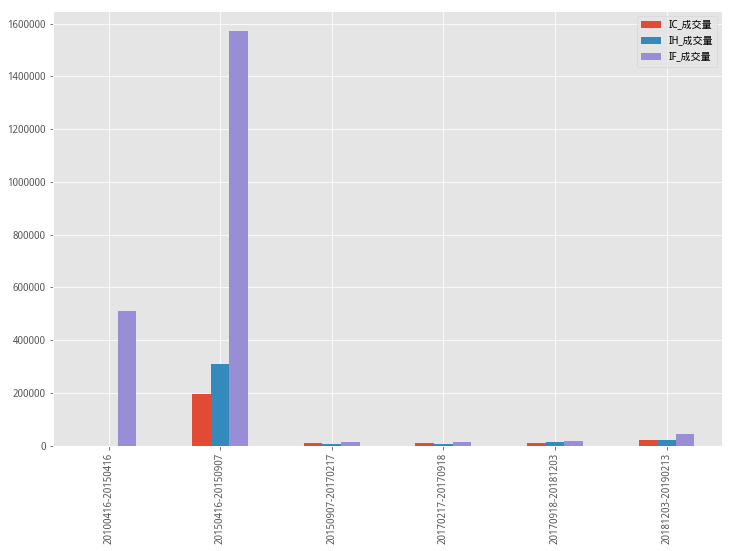

In [21]:
summary_vol.plot(kind='bar',figsize=(12,8))

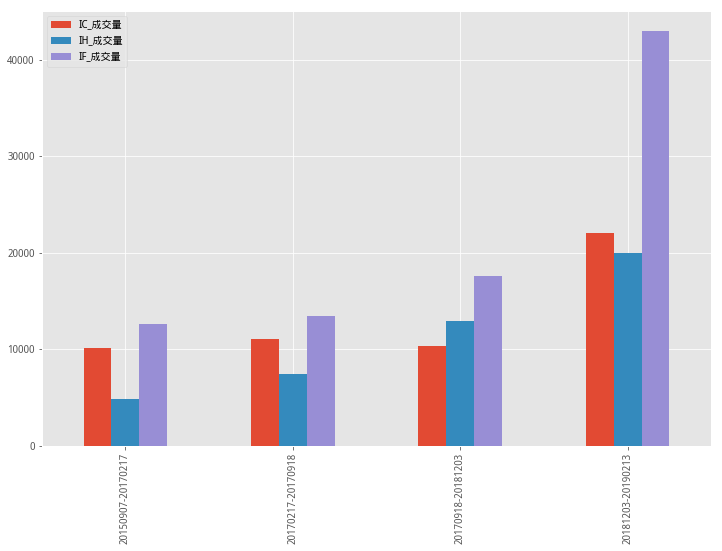

In [22]:
#单独显示限制之后的成交量情况
summary_vol.iloc[2:,:].plot(kind='bar',figsize=(12,8))

In [23]:
#基差率放在一张图上展示
summary_dev = pd.DataFrame(index=summary_ih.index)
summary_dev['IC_基差率']=summary_ic['基差率']
summary_dev['IH_基差率']=summary_ih['基差率']
summary_dev['IF_基差率']=summary_if['基差率']
summary_dev

,IC_基差率,IH_基差率,IF_基差率
20100416-20150416,NaN,NaN,0.001748
20150416-20150907,-0.028709,-0.008984,-0.016358
20150907-20170217,-0.016422,-0.007154,-0.012178
20170217-20170918,-0.005539,-0.002364,-0.003844
20170918-20181203,-0.005325,-0.000798,-0.002332
20181203-20190213,-0.004066,0.000813,0.000384


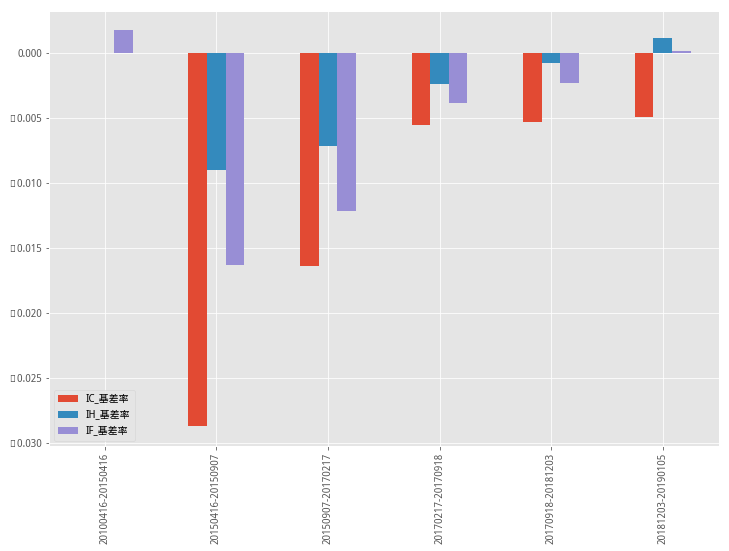

In [93]:
summary_dev.plot(kind='bar',figsize=(12,8))

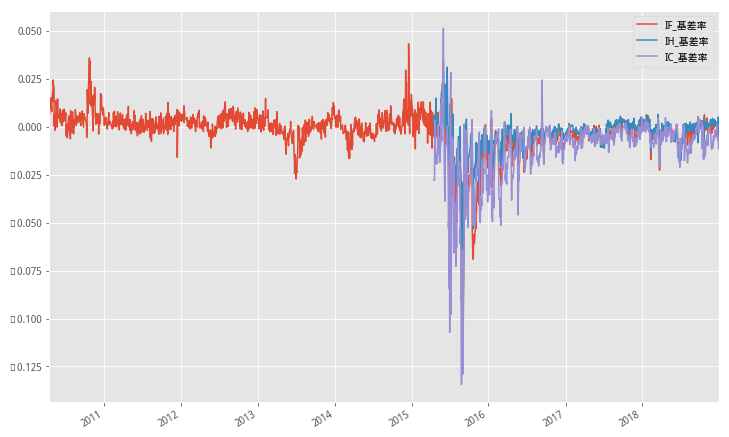

In [24]:
dev_df = pd.DataFrame()
dev_df['IF_基差率'] = cal_mean('2010-4-16','2019-1-1','IF9999.CCFX',df,df_volume)[-1]
dev_df['IH_基差率'] = cal_mean('2010-4-16','2019-1-1','IH9999.CCFX',df,df_volume)[-1]
dev_df['IC_基差率'] = cal_mean('2010-4-16','2019-1-1','IC9999.CCFX',df,df_volume)[-1]
dev_df.plot(figsize=(12,8))


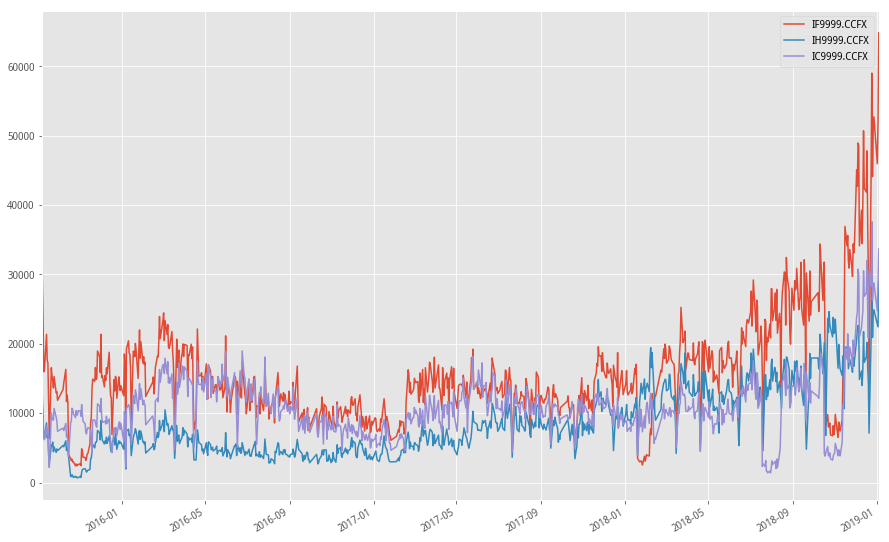

In [95]:
#三个股指期货产品的成交量
df_volume[['IF9999.CCFX','IH9999.CCFX','IC9999.CCFX']].loc['2015-09-06':,:].plot(figsize=(15,10))  #成交量变化